In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seoul2021.csv')
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [ ]:
#대분류(외식,서비스,소매)로 나누기
df.loc[df['서비스_업종_코드'].str.contains('CS1'),'분류'] = '외식업'
df.loc[df['서비스_업종_코드'].str.contains('CS2'),'분류'] = '서비스업'
df.loc[df['서비스_업종_코드'].str.contains('CS3'),'분류'] = '소매업'
df.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,분류
0,2021,1,A,골목상권,2110001,이북5도청사,CS100001,한식음식점,626851391.0,25502,...,15667,7253,108,1098,2013,4344,7792,7568,28,외식업


In [ ]:
#필요한 열만 가져오기

food = df[df['분류']=='외식업']

food = food[food['상권_구분_코드_명']!='관광특구']

food = food[['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명', '주중_매출_건수', '주말_매출_건수',
             '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수',
             '남성_매출_건수', '여성_매출_건수',
             '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수','연령대_50_매출_건수', '연령대_60_이상_매출_건수' ]]
food.head(1)

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,주중_매출_건수,주말_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,골목상권,이북5도청사,한식음식점,16355,9147,0,2988,10420,4978,6959,157,15667,7253,108,1098,2013,4344,7792,7568


In [ ]:
food['상권_구분_코드_명'].value_counts()

골목상권    22078
발달상권     8731
전통시장     5655
관광특구      232
Name: 상권_구분_코드_명, dtype: int64

In [ ]:
#분기당 합쳐서 1년 건수
year_number = food.groupby(['상권_구분_코드_명','상권_코드_명','서비스_업종_코드_명']).sum().reset_index()
year_number

,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,주중_매출_건수,주말_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,골목상권,4.19민주묘지역 2번,분식전문점,37218,23573,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,일식음식점,3549,834,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,치킨전문점,5843,3380,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,커피-음료,119165,63142,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,한식음식점,72795,42203,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,커피-음료,9812,1497,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,한식음식점,57868,13958,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,호프-간이주점,203,86,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,양식음식점,17593,6470,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#열이름 바꾸기
year_number.columns = ['상권', '지역', '업종', '주중', '주말', '0시~6시', '6시~11시', '11시~14시', '14시~17시', '17시~21시','21시~24시', '남성', '여성', '10대', '20대', '30대', '40대','50대','60대이상']
year_number

,상권,지역,업종,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,4.19민주묘지역 2번,분식전문점,37218,23573,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,4.19민주묘지역 2번,일식음식점,3549,834,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,4.19민주묘지역 2번,치킨전문점,5843,3380,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,4.19민주묘지역 2번,커피-음료,119165,63142,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,4.19민주묘지역 2번,한식음식점,72795,42203,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,후암시장,커피-음료,9812,1497,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,후암시장,한식음식점,57868,13958,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,후암시장,호프-간이주점,203,86,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,흑석시장,양식음식점,17593,6470,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
# 주중/5, 주말/2
year_number['주중'] = year_number['주중']/5
year_number['주말'] = year_number['주말']/2
year_number= year_number.drop(columns = ['업종','지역'])
year_number

,상권,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,7443.6,11786.5,0,2208,22352,14506,20660,1065,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,709.8,417.0,0,6,2394,664,1296,23,1854,2473,114,1670,739,523,729,551
2,골목상권,1168.6,1690.0,14,0,416,911,5443,2439,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,23833.0,31571.0,66,23705,44283,57284,47722,9247,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,14559.0,21101.5,18,4066,37327,23062,45191,5334,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,1962.4,748.5,0,404,8522,1509,860,14,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,11573.6,6979.0,520,1197,26472,6734,30575,6328,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,40.6,43.0,6,0,0,0,84,199,74,160,0,10,27,22,154,20
9461,전통시장,3518.6,3235.0,0,853,11421,7290,4499,0,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
#시간대로 나눠주기
year_number['0시~6시'] = year_number['0시~6시']/6
year_number['6시~11시'] = year_number['6시~11시']/5
year_number['11시~14시'] = year_number['11시~14시']/3
year_number['14시~17시'] = year_number['14시~17시']/3
year_number['17시~21시'] = year_number['17시~21시']/4
year_number['21시~24시'] = year_number['21시~24시']/3
year_number

,상권,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
0,골목상권,7443.6,11786.5,0.000000,441.6,7450.666667,4835.333333,5165.00,355.000000,31217,28232,351,8893,9586,13278,14273,13069
1,골목상권,709.8,417.0,0.000000,1.2,798.000000,221.333333,324.00,7.666667,1854,2473,114,1670,739,523,729,551
2,골목상권,1168.6,1690.0,2.333333,0.0,138.666667,303.666667,1360.75,813.000000,5342,3708,65,1324,1740,2490,2098,1329
3,골목상권,23833.0,31571.0,11.000000,4741.0,14761.000000,19094.666667,11930.50,3082.333333,70295,110366,5100,52884,36103,37353,33791,15428
4,골목상권,14559.0,21101.5,3.000000,813.2,12442.333333,7687.333333,11297.75,1778.000000,70682,41366,328,8893,13351,20668,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,1962.4,748.5,0.000000,80.8,2840.666667,503.000000,215.00,4.666667,4642,3075,0,1289,2399,1829,1385,818
9459,전통시장,11573.6,6979.0,86.666667,239.4,8824.000000,2244.666667,7643.75,2109.333333,37217,19315,733,8403,14967,12844,13626,5958
9460,전통시장,40.6,43.0,1.000000,0.0,0.000000,0.000000,21.00,66.333333,74,160,0,10,27,22,154,20
9461,전통시장,3518.6,3235.0,0.000000,170.6,3807.000000,2430.000000,1124.75,0.000000,13643,9907,112,3783,4887,5036,6264,3465


In [ ]:
year_number.corr()

,주중,주말,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,남성,여성,10대,20대,30대,40대,50대,60대이상
주중,1.000000,0.818638,0.315626,0.829877,0.950213,0.892397,0.843857,0.606757,0.986672,0.942065,0.586426,0.906178,0.983589,0.970804,0.928248,0.735744
주말,0.818638,1.000000,0.407041,0.597084,0.699657,0.928946,0.944843,0.748717,0.849136,0.926786,0.787392,0.902321,0.822252,0.824443,0.883182,0.754110
0시~6시,0.315626,0.407041,1.000000,0.129674,0.265630,0.269942,0.438593,0.584216,0.385472,0.304048,0.298130,0.356263,0.307939,0.299688,0.359777,0.338470
6시~11시,0.829877,0.597084,0.129674,1.000000,0.683569,0.794936,0.519818,0.334411,0.783812,0.812589,0.432720,0.777899,0.873880,0.807341,0.679121,0.430636
11시~14시,0.950213,0.699657,0.265630,0.683569,1.000000,0.770734,0.763075,0.483780,0.937669,0.825950,0.474946,0.793011,0.906279,0.913052,0.872354,0.710009
14시~17시,0.892397,0.928946,0.269942,0.794936,0.770734,1.000000,0.834491,0.555105,0.884085,0.969552,0.764061,0.944418,0.911556,0.881718,0.858212,0.652269
17시~21시,0.843857,0.944843,0.438593,0.519818,0.763075,0.834491,1.000000,0.833480,0.878710,0.886375,0.703420,0.851995,0.812641,0.841690,0.925446,0.838991
21시~24시,0.606757,0.748717,0.584216,0.334411,0.483780,0.555105,0.833480,1.000000,0.656345,0.657261,0.517571,0.647422,0.589155,0.606081,0.698670,0.663527
남성,0.986672,0.849136,0.385472,0.783812,0.937669,0.884085,0.878710,0.656345,1.000000,0.926723,0.597519,0.902987,0.966084,0.961029,0.949346,0.786724
여성,0.942065,0.926786,0.304048,0.812589,0.825950,0.969552,0.886375,0.657261,0.926723,1.000000,0.730526,0.961177,0.953260,0.931007,0.907109,0.698197


In [ ]:
year_number.loc[year_number['주중']>year_number['주말'], '요일'] = '주중'
year_number.loc[year_number['주말']>year_number['주중'], '요일'] = '주말'
year_number.loc[year_number['남성']>year_number['여성'], '성별'] = '남성'
year_number.loc[year_number['여성']>year_number['남성'], '성별'] = '여성'
year_number = year_number.drop(columns=['주중','주말'])
year_number = year_number.drop(columns=['남성','여성'])
year_number

,상권,0시~6시,6시~11시,11시~14시,14시~17시,17시~21시,21시~24시,10대,20대,30대,40대,50대,60대이상,요일,성별
0,골목상권,0.000000,441.6,7450.666667,4835.333333,5165.00,355.000000,351,8893,9586,13278,14273,13069,주말,남성
1,골목상권,0.000000,1.2,798.000000,221.333333,324.00,7.666667,114,1670,739,523,729,551,주중,여성
2,골목상권,2.333333,0.0,138.666667,303.666667,1360.75,813.000000,65,1324,1740,2490,2098,1329,주말,남성
3,골목상권,11.000000,4741.0,14761.000000,19094.666667,11930.50,3082.333333,5100,52884,36103,37353,33791,15428,주말,여성
4,골목상권,3.000000,813.2,12442.333333,7687.333333,11297.75,1778.000000,328,8893,13351,20668,34068,34737,주말,남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,0.000000,80.8,2840.666667,503.000000,215.00,4.666667,0,1289,2399,1829,1385,818,주중,남성
9459,전통시장,86.666667,239.4,8824.000000,2244.666667,7643.75,2109.333333,733,8403,14967,12844,13626,5958,주중,남성
9460,전통시장,1.000000,0.0,0.000000,0.000000,21.00,66.333333,0,10,27,22,154,20,주말,여성
9461,전통시장,0.000000,170.6,3807.000000,2430.000000,1124.75,0.000000,112,3783,4887,5036,6264,3465,주중,남성


In [ ]:
year_number['0시~11시'] = year_number['0시~6시'] + year_number['6시~11시']
year_number['11시~17시'] = year_number['11시~14시'] + year_number['14시~17시']
year_number['17시~24시'] = year_number['17시~21시'] + year_number['21시~24시']
year_number['30~40대'] = (year_number['30대'] + year_number['40대'])/2
year_number = year_number.drop(columns=['0시~6시','6시~11시','11시~14시','14시~17시','17시~21시','21시~24시','30대','40대'])
year_number = year_number[['상권','요일','성별','0시~11시','11시~17시','17시~24시','10대','20대','30~40대','50대', '60대이상']]
year_number

,상권,요일,성별,0시~11시,11시~17시,17시~24시,10대,20대,30~40대,50대,60대이상
0,골목상권,주말,남성,441.600000,12286.000000,5520.000000,351,8893,11432.0,14273,13069
1,골목상권,주중,여성,1.200000,1019.333333,331.666667,114,1670,631.0,729,551
2,골목상권,주말,남성,2.333333,442.333333,2173.750000,65,1324,2115.0,2098,1329
3,골목상권,주말,여성,4752.000000,33855.666667,15012.833333,5100,52884,36728.0,33791,15428
4,골목상권,주말,남성,816.200000,20129.666667,13075.750000,328,8893,17009.5,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,주중,남성,80.800000,3343.666667,219.666667,0,1289,2114.0,1385,818
9459,전통시장,주중,남성,326.066667,11068.666667,9753.083333,733,8403,13905.5,13626,5958
9460,전통시장,주말,여성,1.000000,0.000000,87.333333,0,10,24.5,154,20
9461,전통시장,주중,남성,170.600000,6237.000000,1124.750000,112,3783,4961.5,6264,3465


In [ ]:
for i in ['요일','성별']:
  year_number[i] = year_number[i].astype('category').cat.codes
year_number

,상권,요일,성별,0시~11시,11시~17시,17시~24시,10대,20대,30~40대,50대,60대이상
0,골목상권,0,0,441.600000,12286.000000,5520.000000,351,8893,11432.0,14273,13069
1,골목상권,1,1,1.200000,1019.333333,331.666667,114,1670,631.0,729,551
2,골목상권,0,0,2.333333,442.333333,2173.750000,65,1324,2115.0,2098,1329
3,골목상권,0,1,4752.000000,33855.666667,15012.833333,5100,52884,36728.0,33791,15428
4,골목상권,0,0,816.200000,20129.666667,13075.750000,328,8893,17009.5,34068,34737
...,...,...,...,...,...,...,...,...,...,...,...
9458,전통시장,1,0,80.800000,3343.666667,219.666667,0,1289,2114.0,1385,818
9459,전통시장,1,0,326.066667,11068.666667,9753.083333,733,8403,13905.5,13626,5958
9460,전통시장,0,1,1.000000,0.000000,87.333333,0,10,24.5,154,20
9461,전통시장,1,0,170.600000,6237.000000,1124.750000,112,3783,4961.5,6264,3465


In [ ]:
#데이터 섞기
#year_number=year_number.sample(frac=1).reset_index(drop=True)
#year_number

In [ ]:
X = year_number.drop(columns=['상권'])
Y = year_number['상권']
print(X.shape, Y.shape)

(9463, 10) (9463,)


In [ ]:
year_number.columns

Index(['상권', '요일', '성별', '0시~11시', '11시~17시', '17시~24시', '10대', '20대',
       '30~40대', '50대', '60대이상'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = ['요일', '성별', '0시~11시', '11시~17시', '17시~24시', '10대', '20대', '30~40대', '50대', '60대이상']
X[scaler] = StandardScaler().fit_transform(X[scaler])
X

,요일,성별,0시~11시,11시~17시,17시~24시,10대,20대,30~40대,50대,60대이상
0,-1.081398,-0.652563,-0.145269,-0.131935,-0.212374,-0.206367,-0.200883,-0.177832,-0.089133,0.109910
1,0.922375,1.514174,-0.172530,-0.302362,-0.398965,-0.238560,-0.271587,-0.314355,-0.393219,-0.380846
2,-1.081398,-0.652563,-0.172460,-0.311090,-0.332717,-0.245216,-0.274974,-0.295598,-0.362483,-0.350345
3,-1.081398,1.514174,0.121545,0.194344,0.129022,0.438722,0.229735,0.141908,0.349080,0.202392
4,-1.081398,-0.652563,-0.122082,-0.013286,0.059358,-0.209491,-0.200883,-0.107332,0.355299,0.959382
...,...,...,...,...,...,...,...,...,...,...
9458,0.922375,-0.652563,-0.167603,-0.267203,-0.402993,-0.254045,-0.275317,-0.295610,-0.378491,-0.370378
9459,0.922375,-0.652563,-0.152421,-0.150349,-0.060137,-0.154477,-0.205679,-0.146567,-0.103659,-0.168870
9460,-1.081398,1.514174,-0.172543,-0.317782,-0.407752,-0.254045,-0.287836,-0.322021,-0.406129,-0.401663
9461,0.922375,-0.652563,-0.162044,-0.223436,-0.370443,-0.238832,-0.250903,-0.259618,-0.268949,-0.266606


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score
from sklearn.metrics import f1_score, classification_report

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=3)

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict(xtest)
    #C = f1_score(ytest, ypred, average='macro')
    C = accuracy_score(ytest, ypred)
    #D = classification_report(ytest, ypred)
    return C
    #'{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

    dtree = DecisionTreeClassifier()
    grid_parameters = {"max_depth": [1,2, 3, 4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10]}
    model6 = GridSearchCV(dtree, param_grid=grid_parameters, cv=3, refit=True).fit(xtrain, ytrain)
    print('model6', get_scores(model6, xtrain, xtest, ytrain, ytest))
    print(f"최적의 파라미터: {model6.best_params_}, 최고 정확도: {model6.best_score_}")
    
    lgbm_wrapper = LGBMClassifier(n_estimators=400) #트리갯수(반복횟수)
    evals =[(xtest, ytest)]
    model7 = lgbm_wrapper.fit(xtrain, ytrain, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
    print('model7', get_scores(model7, xtrain, xtest, ytrain, ytest))


make_models(xtrain, xtest, ytrain, ytest)


model2 1 0.5857696371961958
model2 2 0.6516379006692498
model2 3 0.6470588235294118
model2 4 0.6600915815427968
model2 5 0.6696019725255372
model2 6 0.6741810496653752
model2 7 0.6720676294469884
model2 8 0.6745332863684396
model2 9 0.6724198661500528
model3 0.5589996477632969
model3 3 0.6741810496653752
model3 4 0.679464600211342
model3 5 0.6805213103205354
model3 6 0.6791123635082775
model3 7 0.6745332863684396
model4 0.6967241986615005
model4 3 0.6741810496653752
model4 4 0.6780556533990841
model4 5 0.6843959140542445
model4 6 0.6917928848185981
model4 7 0.6942585417400493
model5 0.6963719619584361
model6 0.679464600211342
최적의 파라미터: {'max_depth': 4, 'min_samples_split': 2}, 최고 정확도: 0.6737620772946861
[1]	valid_0's multi_logloss: 0.936114	valid_0's multi_logloss: 0.936114
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.914349	valid_0's multi_logloss: 0.914349
[3]	valid_0's multi_logloss: 0.896582	valid_0's multi_logloss: 0.896582
[4]	vali

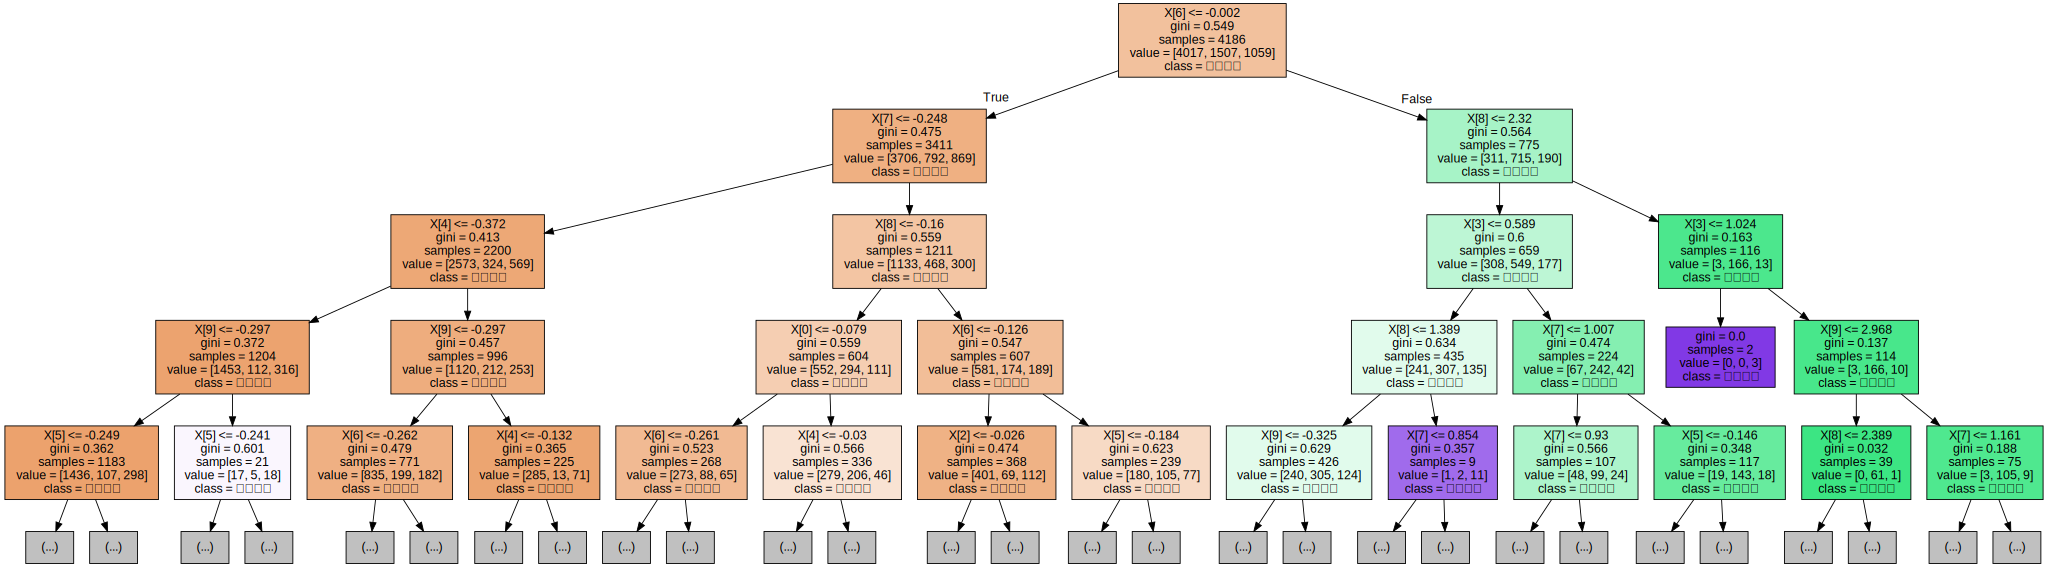

In [ ]:
from sklearn.tree import export_graphviz
model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)

estimator = model4.estimators_[1]
export_graphviz(estimator, out_file="tree.dot", class_names = Y, max_depth=4,
                           feature_names = None, impurity=True, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


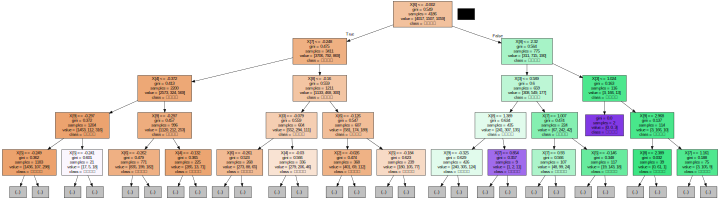

In [ ]:
!pip install pydotplus
import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [ ]:
'''
model2 1 0.5956768249468463
model2 2 0.6615875265768958
model2 3 0.6576895818568391
model2 4 0.6672572643515238
model2 5 0.6778880226789511
model2 6 0.6828490432317506
model2 7 0.6856839121190645
model2 8 0.6839121190644932
model2 9 0.6810772501771793
model3 0.5598866052445074
model3 3 0.6782423812898654
model3 4 0.6867469879518072
model3 5 0.6881644223954642
model3 6 0.6832034018426648
model3 7 0.6856839121190645
model4 0.7005669737774628
model4 3 0.6789510985116939
model4 4 0.6842664776754075
model4 5 0.6895818568391212
model4 6 0.6956059532246633
model4 7 0.6980864635010631
model5 0.6998582565556343
model6 0.6867469879518072
최적의 파라미터: {'max_depth': 4, 'min_samples_split': 2} 최고 정확도: 0.6799336770608596
model7 0.7069454287739192
'''

In [ ]:
# test점수
testList = []
for k in range(1,101):
    # 모델 선택 및 하이퍼 파라미터 튜닝
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(xtrain, ytrain)
    # 모델 평가
    testList.append(model.score(xtest, ytest))
    print(f"이웃{k}개 : {testList[k-1]}")

이웃1개 : 0.9940119760479041
이웃2개 : 0.9862627685804861
이웃3개 : 0.9732300105671011
이웃4개 : 0.9545614653046848
이웃5개 : 0.9369496301514618
이웃6개 : 0.9200422684043678
이웃7개 : 0.8999647763296935
이웃8개 : 0.8728425501937301
이웃9개 : 0.8531172948221205
이웃10개 : 0.8133145473758365
이웃11개 : 0.7911236350827756
이웃12개 : 0.7671715392743924
이웃13개 : 0.7421627333568158
이웃14개 : 0.7196195843606904
이웃15개 : 0.6977809087706939
이웃16개 : 0.6879182810848891
이웃17개 : 0.679464600211342
이웃18개 : 0.6819302571327932
이웃19개 : 0.68404367735118
이웃20개 : 0.6812257837266643
이웃21개 : 0.6773511799929552
이웃22개 : 0.6674885523071504
이웃23개 : 0.6678407890102148
이웃24개 : 0.6650228953856991
이웃25개 : 0.6597393448397323
이웃26개 : 0.6576259246213455
이웃27개 : 0.6467065868263473
이웃28개 : 0.6421275096865093
이웃29개 : 0.6389573793589292
이웃30개 : 0.6396618527650582
이웃31개 : 0.6347305389221557
이웃32개 : 0.6389573793589292
이웃33개 : 0.6322648820007045
이웃34개 : 0.6273335681578021
이웃35개 : 0.6262768580486087
이웃36개 : 0.6199365973934484
이웃37개 : 0.6181754138781261
이웃38개 : 0.618

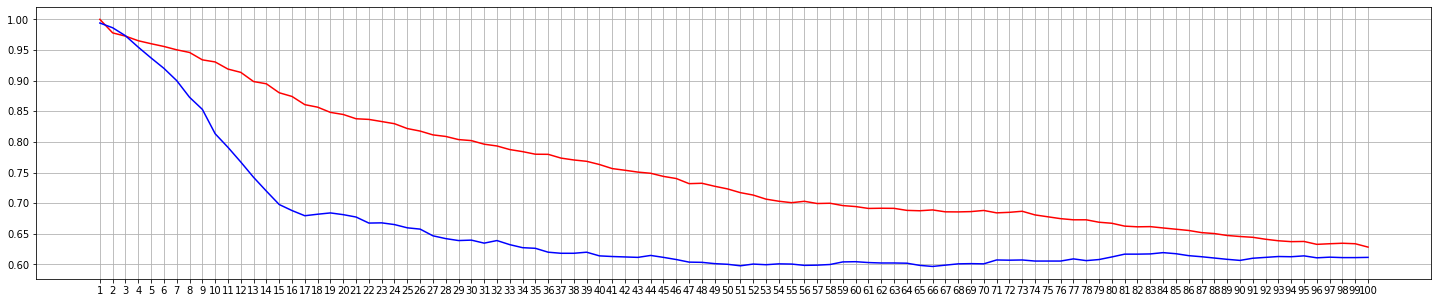

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5)) # 출력할 그래프 크기
plt.plot(range(1, 101), # X데이터 = 1~100
        trainList,  # y데이터
         c="red")
plt.plot(range(1, 101), # X데이터 = 1~100
        testList,  # y데이터
         c="blue")

plt.xticks(range(1,101))
plt.grid() #기준선
plt.show()

In [ ]:
''' 지역 label encoding만 했을때
model1 0.6529 0.6619 0.2961
model2 1 1.0000 0.9923 0.9923
model2 2 0.9953 0.9859 0.9863
model2 3 0.9931 0.9725 0.9749
model2 4 0.9837 0.9620 0.9635
model2 5 0.9757 0.9422 0.9473
model2 6 0.9540 0.9105 0.9045
model2 7 0.9438 0.8912 0.8775
model2 8 0.9238 0.8672 0.8456
model2 9 0.9055 0.8454 0.8104
model3 1.0000 0.5689 0.3833
model3 3 0.6713 0.6766 0.3299
model3 4 0.6848 0.6840 0.3527
model3 5 0.6908 0.6844 0.3459
model3 6 0.7029 0.6816 0.3553
model3 7 0.7192 0.6784 0.3809
model4 1.0000 0.7108 0.3888
model4 3 0.6735 0.6784 0.3267
model4 4 0.6818 0.6858 0.3347
model4 5 0.6955 0.6943 0.3445
model4 6 0.7088 0.6978 0.3479
model4 7 0.7249 0.7024 0.3542
model5 0.7227 0.7017 0.4788
'''

'''오버샘플링 했을때
model1 0.4781 0.4498 0.3111
model2 1 1.0000 0.9514 0.9518
model2 2 0.9823 0.9757 0.9744
model2 3 0.9775 0.9496 0.9517
model2 4 0.9732 0.9595 0.9596
model2 5 0.9678 0.9338 0.9382
model2 6 0.9665 0.9369 0.9407
model2 7 0.9597 0.8979 0.9099
model2 8 0.9585 0.9045 0.9149
model2 9 0.9476 0.8637 0.8831
model3 1.0000 0.5287 0.4316
model3 3 0.5332 0.5097 0.3636
model3 4 0.6026 0.4241 0.3312
model3 5 0.6332 0.4974 0.3824
model3 6 0.6568 0.4618 0.3797
model3 7 0.6928 0.5104 0.4206
model4 1.0000 0.6249 0.5234
model4 3 0.5540 0.4470 0.3158
model4 4 0.6046 0.4695 0.3450
model4 5 0.6453 0.4970 0.3762
model4 6 0.6842 0.5206 0.3994
model4 7 0.7127 0.5347 0.4166
model5 0.7441 0.5826 0.5197
'''

''' 요일,성별 범주형으로 변환
model1 0.4823 0.4727 0.3400
model2 1 1.0000 0.9461 0.8399
model2 2 0.9779 0.9732 0.8734
model2 3 0.9726 0.9496 0.8479
model2 4 0.9651 0.9577 0.8823
model2 5 0.9602 0.9359 0.8870
model2 6 0.9558 0.9359 0.8996
model2 7 0.9503 0.9056 0.8804
model2 8 0.9460 0.9063 0.8919
model2 9 0.9339 0.8683 0.8577
model3 1.0000 0.5474 0.5219
model3 3 0.5304 0.3079 0.2573
model3 4 0.6051 0.4375 0.3403
model3 5 0.6364 0.5632 0.3699
model3 6 0.6890 0.5678 0.4389
model3 7 0.7240 0.6245 0.4853
model4 1.0000 0.6555 0.4972
model4 3 0.5507 0.4667 0.3287
model4 4 0.6138 0.5009 0.3686
model4 5 0.6603 0.5379 0.3939
model4 6 0.6969 0.5657 0.4162
model4 7 0.7435 0.5995 0.4356
model5 0.7703 0.6604 0.5358
'''

''' 지역빼고 스탠다드스케일
model2 1 0.9998 0.5822 0.3679
model2 2 0.7900 0.6573 0.3785
model2 3 0.7816 0.6541 0.3744
model2 4 0.7547 0.6717 0.3678
model2 5 0.7474 0.6738 0.3646
model2 6 0.7325 0.6823 0.3669
model2 7 0.7261 0.6851 0.3696
model2 8 0.7225 0.6886 0.3642
model2 9 0.7160 0.6876 0.3638
model3 0.9998 0.5646 0.3664
model3 3 0.6680 0.6774 0.3353
model3 4 0.6901 0.6858 0.3469
model3 5 0.6946 0.6784 0.3379
model3 6 0.7024 0.6714 0.3608
model3 7 0.7178 0.6731 0.3759
model4 0.9998 0.7027 0.4039
model4 3 0.6747 0.6781 0.3281
model4 4 0.6857 0.6869 0.3378
model4 5 0.6957 0.6900 0.3425
model4 6 0.7092 0.6971 0.3498
model4 7 0.7243 0.7006 0.3568
model5 0.7230 0.6925 0.3570
'''

'''
model2 1 1.0000 0.5724 0.3629
model2 2 0.7920 0.6400 0.3414
model2 3 0.7794 0.6478 0.3708
model2 4 0.7491 0.6590 0.3609
model2 5 0.7440 0.6703 0.3689
model2 6 0.7295 0.6742 0.3636
model2 7 0.7266 0.6759 0.3668
model2 8 0.7186 0.6816 0.3646
model2 9 0.7189 0.6788 0.3622
model3 1.0000 0.5523 0.3445
model3 3 0.6751 0.6700 0.3275
model3 4 0.6848 0.6766 0.3327
model3 5 0.6881 0.6798 0.3663
model3 6 0.7035 0.6819 0.3500
model3 7 0.7148 0.6812 0.3520
model4 1.0000 0.6932 0.3738
model4 3 0.6747 0.6731 0.3195
model4 4 0.6812 0.6756 0.3228
model4 5 0.6907 0.6819 0.3307
model4 6 0.7034 0.6862 0.3375
model4 7 0.7209 0.6943 0.3501
model5 0.7117 0.6939 0.3547
'''

''' 그리드서치추가
model2 1 0.4804710385665382
model2 2 0.44818584816528056
model2 3 0.49537030300036083
model2 4 0.4839785202539004
model2 5 0.47886410546731245
model2 6 0.47806546744988526
model2 7 0.4824080255144143
model2 8 0.46480862788168403
model2 9 0.47224479982873757
model3 0.4543698042228487
model3 3 0.41576341385501697
model3 4 0.4449632060799942
model3 5 0.4476555301040037
model3 6 0.46641476520127173
model3 7 0.47116691367070196
model4 0.49340108763747237
model4 4 0.4247805802774598
model4 5 0.4377163349756547
model4 6 0.4468663760872389
model4 7 0.4598874768830909
model5 0.46219054085545014
model6 0.4449632060799942
최적의 파라미터: {'max_depth': 4, 'min_samples_split': 4}, 최고 정확도: 0.6788686477720351
'''